In [1]:
import model
import numpy as np
import random
from utils import simple_graph
import tank
import truck

In [2]:
# Tanks' information
n = 5 
tank_ids = list(range(1,n+1))
tank_max_loads =  np.array([100., 100., 200., 300., 400.])
tank_current_loads =  np.array([50., 60., 120., 150., 300.])
tank_consumption_rates =  np.array([10.] * n)

n_discrete_load_levels = np.array([5,5,10,10,10])

# Trucks' information
k = 2
truck_ids = list(range(k))
truck_max_loads = np.array([20., 50.])
truck_current_loads = truck_max_loads.copy()
truck_current_positions =  np.array([0] * k)
#truck_fractions_deliverable =  np.array([1.] * k) # we for now we only allow to deliver all the content of the truck
truck_fractions_deliverable =  np.array([ np.array([0.5, 1.]), 
                                          np.array([0.5, 1.])
                                        ]) # we for now we only allow to deliver all the content of the truck
n_discrete_load_levels_trucks = np.array([2,2])

# System's information
def simple_graph(n: int):    
    A = np.zeros((n,n))
    A[0,0:n] = 1
    A = A.astype(int)
    return(A)

graph = simple_graph(n+1)
tanks = [tank.Tank( tank_id, current_load, max_load, consumption_rate, n_lvls) 
         for  tank_id, current_load, max_load, consumption_rate, n_lvls in 
         zip( tank_ids, tank_current_loads, tank_max_loads, tank_consumption_rates, n_discrete_load_levels)]
trucks = [truck.Truck( truck_id, current_load, max_load, current_position, load_fractions_deliverable, n_lvls) 
         for  truck_id, current_load, max_load, current_position, load_fractions_deliverable, n_lvls in 
         zip(truck_ids, truck_current_loads, truck_max_loads, truck_current_positions, 
             truck_fractions_deliverable, n_discrete_load_levels_trucks)]

def simple_weights(n: int, w: float):    
    W = np.full((n,n), np.inf)
    W[0,:] = w
    return(W)
w =  np.array([0, 20., 10., 30., 50.5, 45.])

weights_matrix = simple_weights(n+1, w)




In [3]:
trucks[0].load

20.0

In [4]:
toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)

self.trucks [<truck.Truck object at 0x7faad81b5748>, <truck.Truck object at 0x7faad81b5780>]
[[4, 1], [20.0, 50.0], [40.0, 75.0, 110.0, 140.0, 300.0]]
Final rewards:  -105.5


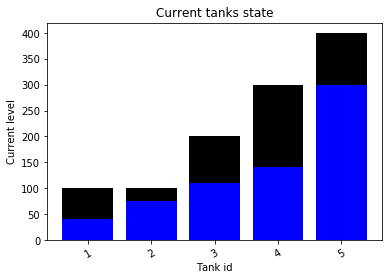

self.trucks [<truck.Truck object at 0x7faad81b5748>, <truck.Truck object at 0x7faad81b5780>]
[[1, 0], [20.0, 50.0], [55.0, 85.0, 100.0, 130.0, 290.0]]
Final rewards:  -65.0


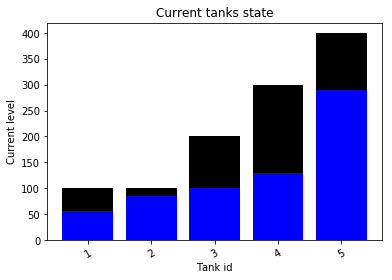

self.trucks [<truck.Truck object at 0x7faad81b5748>, <truck.Truck object at 0x7faad81b5780>]
[[3, 1], [20.0, 50.0], [45.0, 75.0, 90.0, 140.0, 280.0]]
Final rewards:  -70.0


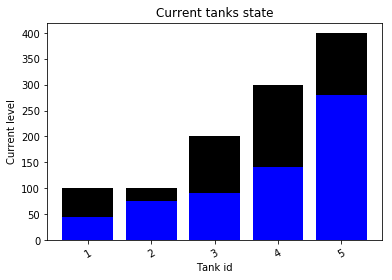

self.trucks [<truck.Truck object at 0x7faad81b5748>, <truck.Truck object at 0x7faad81b5780>]
[[1, 3], [20.0, 50.0], [35.0, 85.0, 80.0, 180.0, 270.0]]
Final rewards:  -120.0


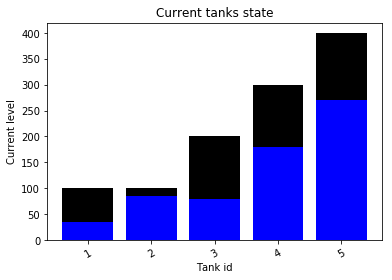

self.trucks [<truck.Truck object at 0x7faad81b5748>, <truck.Truck object at 0x7faad81b5780>]
[[1, 1], [20.0, 50.0], [25.0, 85.0, 70.0, 170.0, 260.0]]
Final rewards:  -50.0


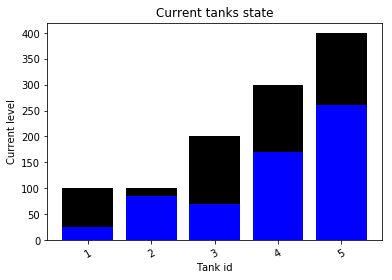

In [5]:
# Simulation
seed = None 

for it in range(5):
    rewards = toy_system.random_action(seed)
    print(toy_system.state())
    print("Final rewards: ", rewards)
    toy_system.reset_trucks_positions()
    toy_system.visualize()

In [6]:
toy_system.trucks

[<truck.Truck at 0x7faad81b5748>, <truck.Truck at 0x7faad81b5780>]

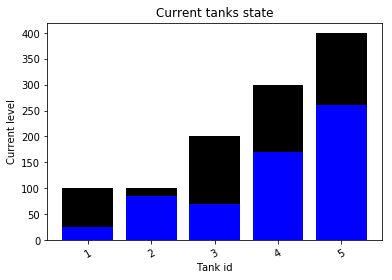

In [7]:
toy_system.visualize()

In [9]:
1

1